In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [2]:
00

In [3]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
df.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [5]:
df.shape

(872, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [7]:
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,NaN,NaN,NaN,436.500000,251.869014,1.0,218.75,436.5,654.25,872.0
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.00,41903.5,53469.50,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.00,39.0,48.00,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.00,9.0,12.00,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.612870,0.0,0.00,0.0,0.00,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.00,1.0,2.00,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [9]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [10]:
### unique values for categorical variables

for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [11]:
df.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

### Univariate / Bivariate analysis

Text(0.5, 1.0, 'no_older_children Distribution')

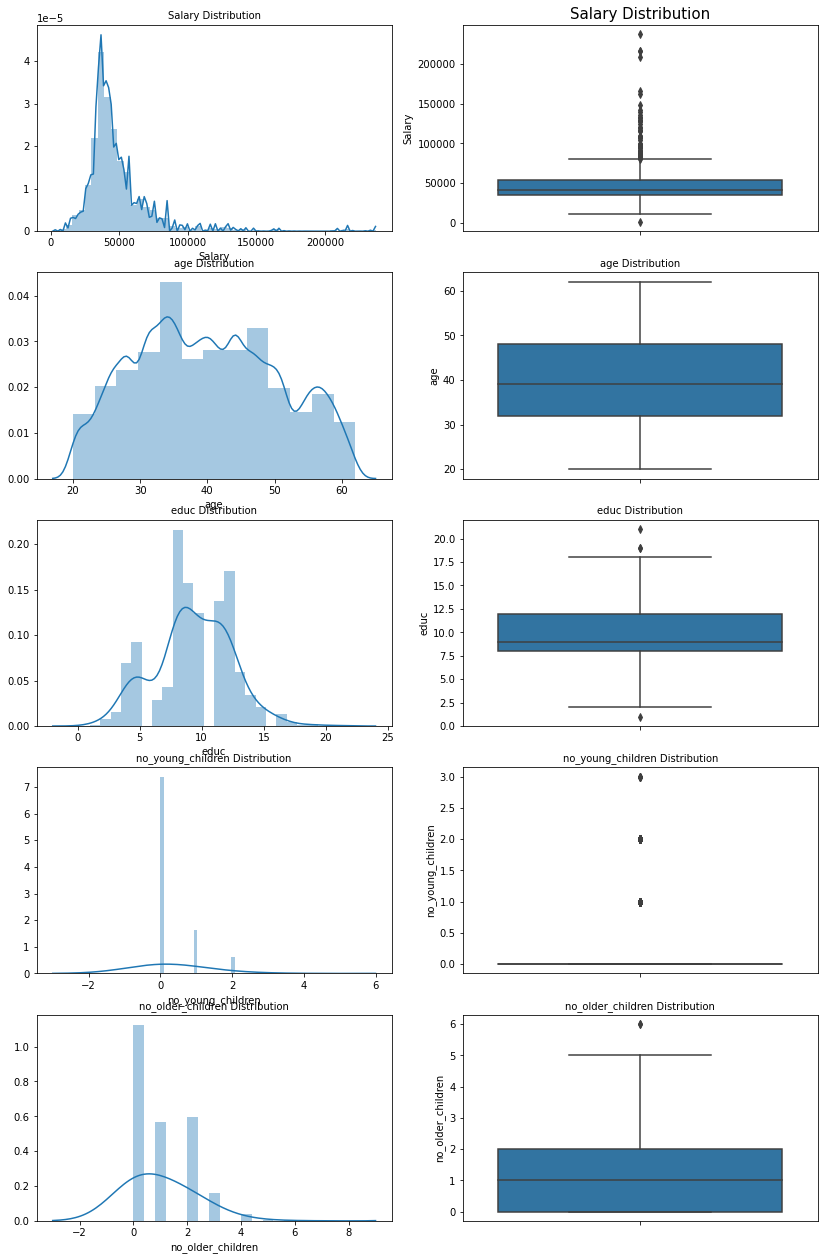

In [12]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(14, 22)

a = sns.distplot(df['Salary'], kde_kws = {'bw' : 1}, ax=axes[0][0])
a.set_title("Salary Distribution", fontsize=10)
a = sns.boxplot(df['Salary'] , orient = "v", ax=axes[0][1])
a.set_title("Salary Distribution",fontsize=15)

a = sns.distplot(df['age'], kde_kws = {'bw' :1}, ax=axes[1][0])
a.set_title("age Distribution",fontsize=10)
a = sns.boxplot(df['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Distribution",fontsize=10)

a = sns.distplot(df['educ'], kde_kws = {'bw': 1}, ax=axes[2][0])
a.set_title("educ Distribution",fontsize=10)
a = sns.boxplot(df['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ Distribution",fontsize=10)

a = sns.distplot(df['no_young_children'], kde_kws = {'bw' : 1}, ax=axes[3][0])
a.set_title("no_young_children Distribution", fontsize=10)
a = sns.boxplot(df['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title("no_young_children Distribution", fontsize=10)

a = sns.distplot(df['no_older_children'], kde_kws = {'bw' : 1}, ax=axes[4][0])
a.set_title("no_older_children Distribution", fontsize=10)
a = sns.boxplot(df['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title("no_older_children Distribution",fontsize=10)

In [13]:
df.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

In [14]:
df.skew()

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

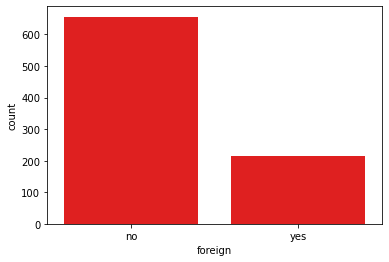

In [15]:
sns.countplot(x="foreign", data=df, color="r")

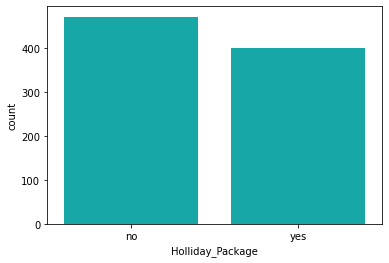

In [16]:
sns.countplot(x="Holliday_Package", data=df, color="c")

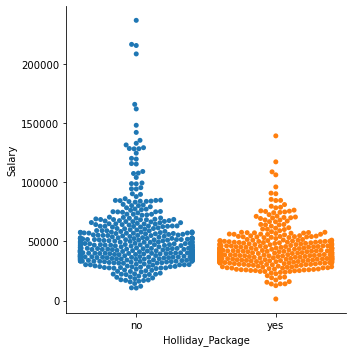

In [17]:
sns.catplot(x="Holliday_Package", y="Salary", kind="swarm",data=df)

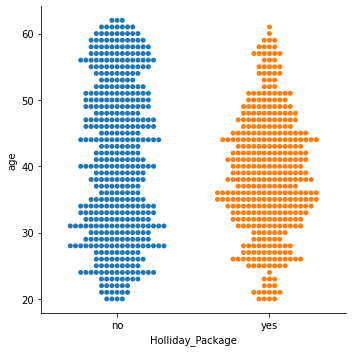

In [18]:
sns.catplot(x="Holliday_Package", y="age",kind="swarm",data=df)

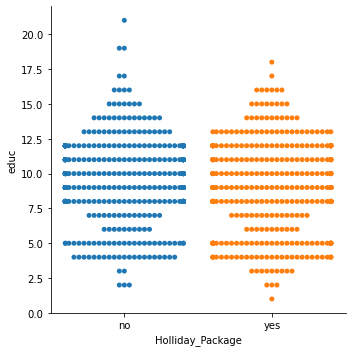

In [19]:
sns.catplot(x="Holliday_Package", y="educ",kind="swarm",data=df)

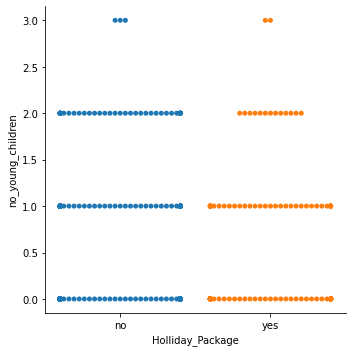

In [20]:
sns.catplot(x="Holliday_Package", y="no_young_children",kind="swarm",data=df)

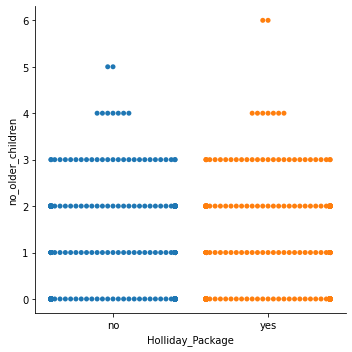

In [21]:
sns.catplot(x="Holliday_Package", y="no_older_children",kind="swarm",data=df)

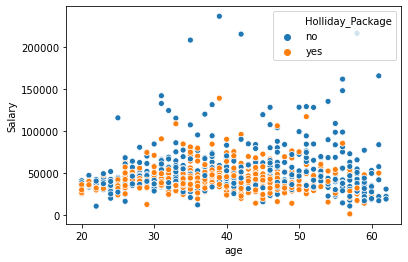

In [22]:
sns.scatterplot(data = df, x='age',y='Salary', hue = 'Holliday_Package')

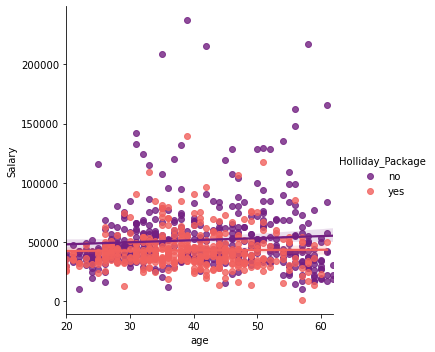

In [23]:
sns.lmplot(x="age", y="Salary", hue="Holliday_Package", data=df, palette="magma")

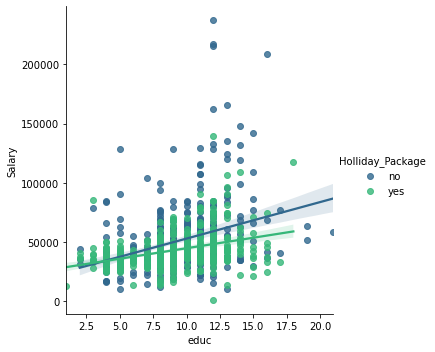

In [24]:
sns.lmplot(x="educ", y="Salary", hue="Holliday_Package", data=df,palette="viridis")

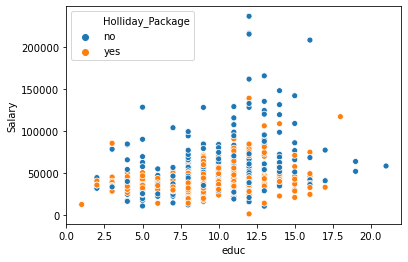

In [25]:
sns.scatterplot(data = df, x='educ',y='Salary', hue = 'Holliday_Package')

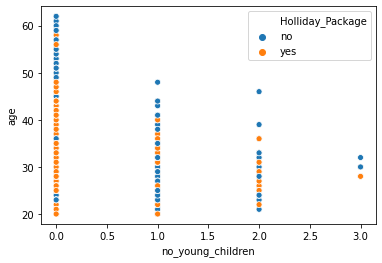

In [26]:
sns.scatterplot(data = df, x='no_young_children',y='age', hue = 'Holliday_Package')

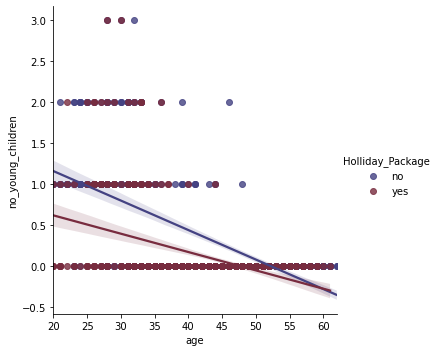

In [27]:
sns.lmplot(x="age", y="no_young_children", hue="Holliday_Package", data=df, palette="icefire")

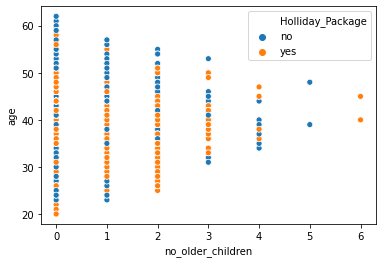

In [28]:
sns.scatterplot(data = df, x='no_older_children',y='age', hue = 'Holliday_Package')

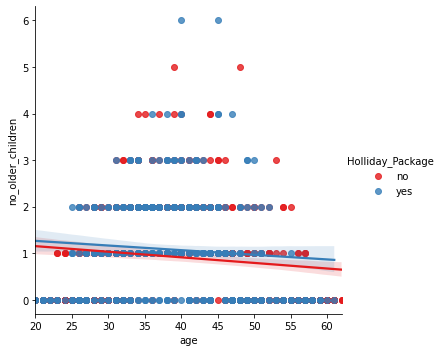

In [29]:
sns.lmplot(x="age", y="no_older_children", hue="Holliday_Package", data=df,palette="Set1")

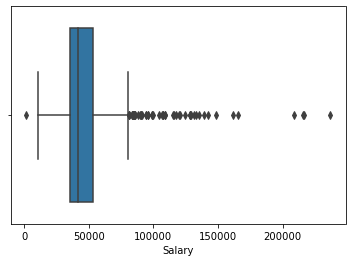

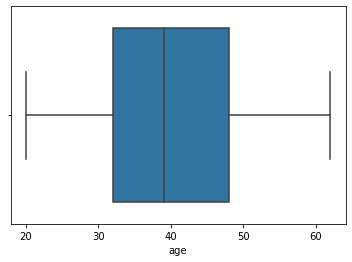

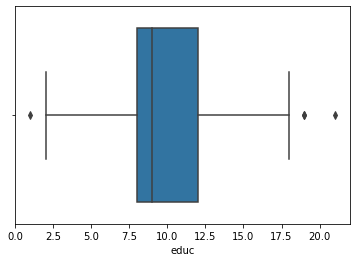

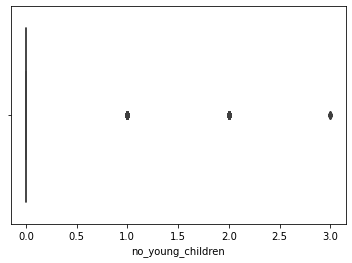

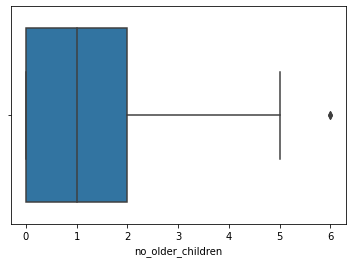

In [30]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']
for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [31]:
df.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

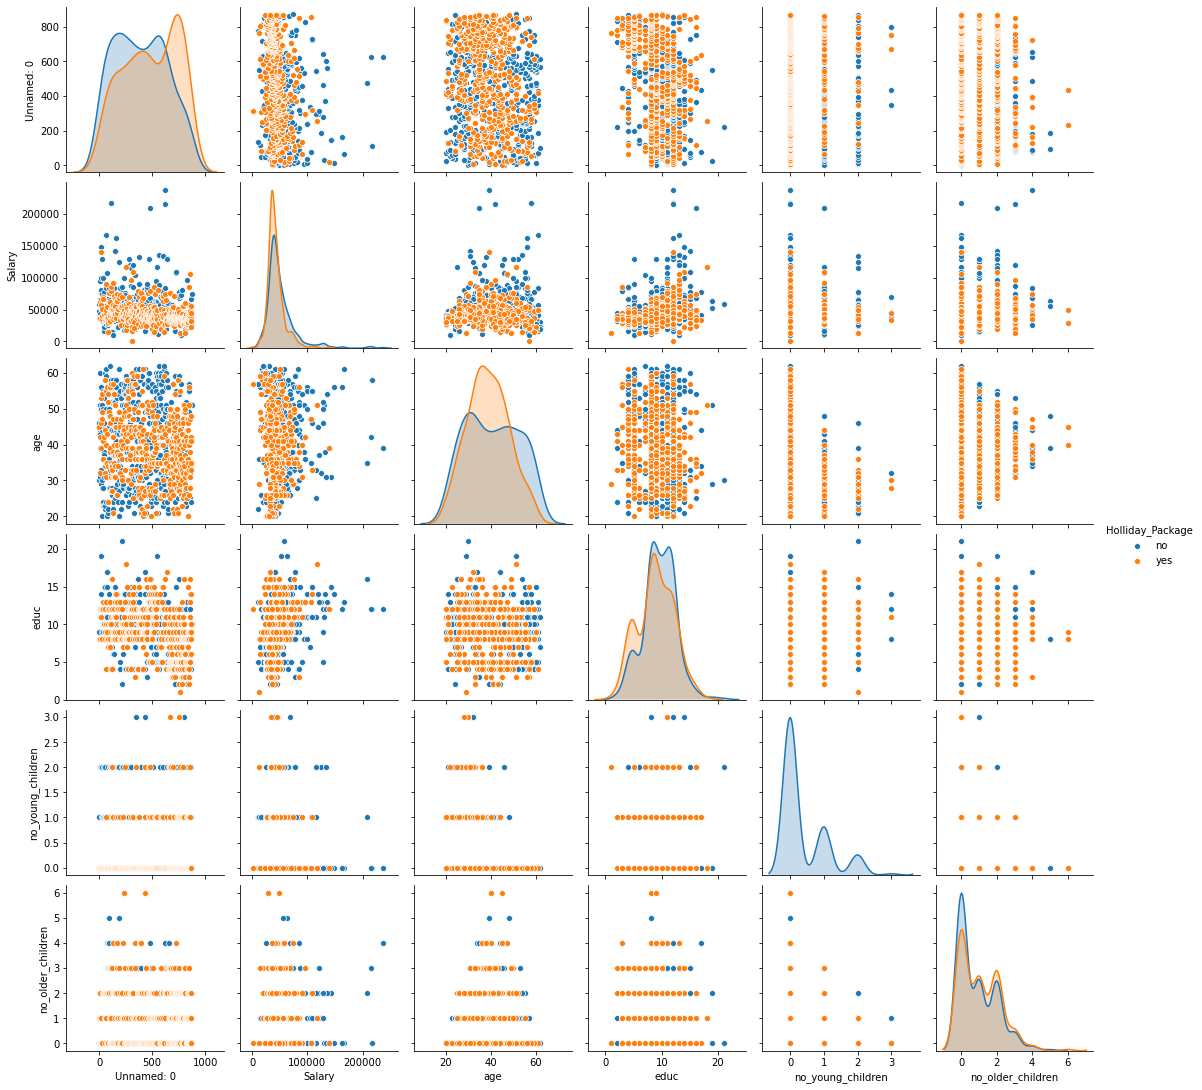

In [32]:
# Pairplot

sns.pairplot(df ,diag_kind='kde' ,hue='Holliday_Package')

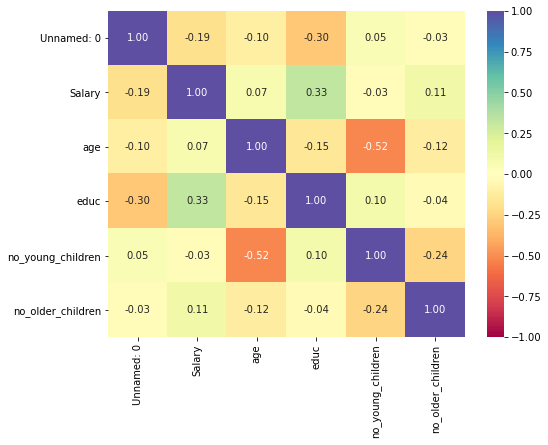

In [33]:
### checking for Correlations

df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, vmin='-1', vmax='1', fmt = '.2f',cmap='Spectral')

In [34]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [35]:
### Treating Outliers

cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index

In [36]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [37]:
for column in df[cont].columns:lr,ur=remove_outlier(df[column])
df[column]=np.where(df[column]>ur,ur,df[column])
df[column]=np.where(df[column]<lr,lr,df[column])

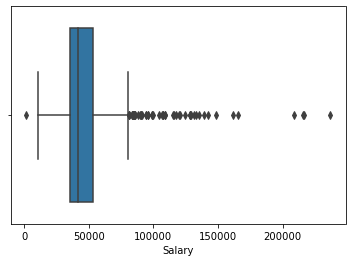

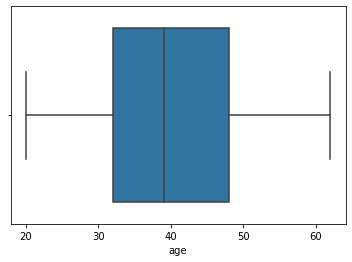

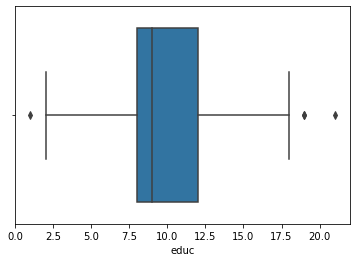

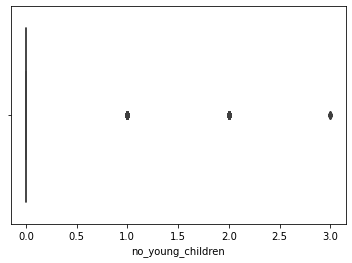

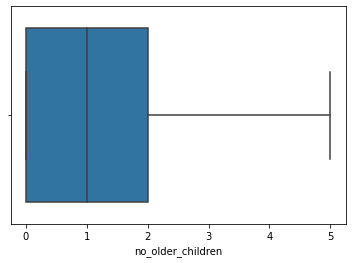

In [38]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']
for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [39]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1.0,no
1,2,yes,37207,45,8,0,1.0,no
2,3,no,58022,46,9,0,0.0,no
3,4,no,66503,31,11,2,0.0,no
4,5,no,66734,44,12,0,2.0,no


In [40]:
# drop the id column as it is useless for the model
df1 = df.drop(columns=['Unnamed: 0'], axis=1)

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    int64  
 2   age                872 non-null    int64  
 3   educ               872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 47.8+ KB


In [42]:
df2 = df1.copy()

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [43]:
# Converting categorical to dummy variables in data

In [44]:
data = pd.get_dummies(df2, columns=['Holliday_Package','foreign'], drop_first = True)

In [45]:
data.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1.0,0,0
1,37207,45,8,0,1.0,1,0
2,58022,46,9,0,0.0,0,0
3,66503,31,11,2,0.0,0,0
4,66734,44,12,0,2.0,0,0


In [46]:
data.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'Holliday_Package_yes', 'foreign_yes'],
      dtype='object')

### Train/ Test split

In [47]:
# predictor variables into X dataframe

X = data.drop('Holliday_Package_yes', axis=1)

# target variable into the y dataframe

y = data['Holliday_Package_yes']

In [48]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify=y)

In [49]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [50]:
# Applying GridSearchCV for Logistic Regression

grid={'penalty':['l1','l2','none'],'solver':['lbfgs', 'liblinear'],'tol':[0.0001,0.000001]}

In [51]:
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [52]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [53]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [54]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=1e-06)


In [55]:
best_model = grid_search.best_estimator_

In [56]:
# Prediction on the training set
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [57]:
ytrain_predict

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [58]:
## Getting the probabilities on the test set
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.676951,0.323049
1,0.566546,0.433454
2,0.688539,0.311461
3,0.517769,0.482231
4,0.545569,0.454431


              precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 



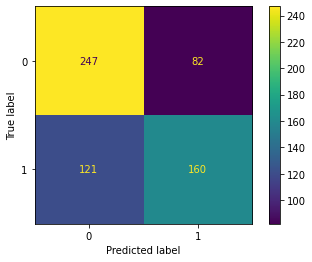

In [59]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       142
           1       0.66      0.53      0.59       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262
 



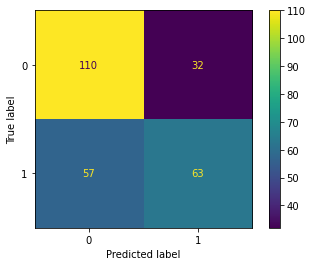

In [60]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [61]:
# Accuracy - Training Data
lr_train_acc = best_model.score(X_train, y_train)
lr_train_acc

0.6672131147540984

AUC: 0.735


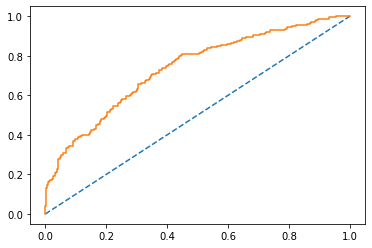

In [62]:
# AUC and ROC for the training data

#predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [63]:
# Accuracy - Test Data
lr_test_acc = best_model.score(X_test, y_test)
lr_test_acc

0.6603053435114504

AUC: 0.719


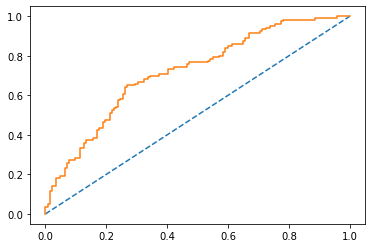

In [64]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [65]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.66
lr_train_recall  0.57
lr_train_f1  0.61


In [66]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df.loc["1"][2],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_precision=round(df.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.66
lr_test_recall  0.52
lr_test_f1  0.59
